<a href="https://colab.research.google.com/github/xMCTH/DSFMCTH/blob/main/Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data Science Fundamentals for DCBP, S. Haug, University of Bern 

# Coding Task 1

- Deadline: Send your solution notebook per email to Sigve by 2022-03-22 17:00
- Estimated effort: 2-5 hours (if you don't progress after 2 hours of trying, search for help, ChatGPT, Google, colleagues, course tutor)
- Data on Ilias: CCD-Data with metadata file CCD-Metadata


## Tasks (maximum 12.5 points)

- **CT-1.1** Write a method (function) which removes the header information in the 
datafile and saves that information into a separate textfile. [0.5 points] 
- **CT-1.2** Write a function which reduces the data resolution by merging/averaging columns such that there is only one column per 1 nm. [2.0 points]  
- **CT-1.3** Now generalize the above merging so that it works for any number nm er column. [2.0 points]
- **CT-1.4** Implement the saving of the reduced dataset to a file. Do this (1) by writing an explicit loop (write line by line) and (2) by using pandas methods. Measure the running times of the two approaches. [2.0 points]
- **CT-1.5** Write a function which takes two wavelengths as input and plots the difference of the data at these lengths over time. [2.0 points] 
- **CT-1.6** Let the x-axis be in seconds, label the axes with names and units, label the plot with color and legend, make a title for the plot. Save the plot to a file. [2.0 points]
- **CT-1.7** Plot the full and some reduced datasets in the same figure. Is there any visual difference? [2.0 points]

In [ ]:
import pandas as pd
from google.colab import drive
import re
import os
import time
import numpy as np
import matplotlib.pyplot as plt

drive.mount('/content/drive')
path = '/content/drive/MyDrive/DataScienceFundamentals/Data/CCD-Data.txt'

def remove_header(file_path):
    with open(path, 'r') as input_file:
      contents = re.split('>.*\n', input_file.read())     #The regular expression '>.*\n' matches any string that starts with a greater-than sign (>) followed by zero or more characters (.*) and ending with a newline character (\n) (CHATGPT)

    with open(path, 'w') as output_file:
      output_file.write(contents[-1])

remove_header(path)  

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/DataScienceFundamentals/Data/CCD-Data.txt', sep='\t')
df.head()

,Unnamed: 0,Unnamed: 1,316.6137,316.7492,316.8847,317.0203,317.1558,317.2913,317.4268,317.5623,...,778.9703,779.089,779.2076,779.3263,779.4449,779.5636,779.6822,779.8008,779.9194,780.0381
0,2018-10-25 10:32:04.789000,1540456324789,0.329672,0.329672,0.329672,0.090294,-0.716926,-1.829304,-0.686330,-0.428776,...,-0.038483,-0.039623,-0.036920,-0.037309,-0.037299,-0.037476,-0.036856,-0.036853,-0.039100,-0.035545
1,2018-10-25 10:32:04.878000,1540456324878,-0.044412,-0.044412,-0.044412,0.157632,-0.672423,-2.183981,-0.492421,-0.000000,...,-0.039428,-0.038486,-0.037309,-0.036357,-0.037289,-0.038728,-0.037214,-0.036902,-0.040210,-0.038165
2,2018-10-25 10:32:04.962000,1540456324962,0.338219,0.338219,0.338219,0.330993,-0.879836,-0.000000,-0.559845,-0.000000,...,-0.037725,-0.037534,-0.036560,-0.036152,-0.036554,-0.036875,-0.037351,-0.036746,-0.038686,-0.036903
3,2018-10-25 10:32:05.046000,1540456325046,-0.049682,-0.049682,-0.049682,0.519086,-0.681150,-0.000000,-0.417230,-0.000000,...,-0.037613,-0.037168,-0.036369,-0.034549,-0.036252,-0.037948,-0.036713,-0.035706,-0.038203,-0.036822
4,2018-10-25 10:32:05.129000,1540456325129,0.335086,0.335086,0.335086,-0.041393,-0.000000,-1.802774,-0.510417,-0.000000,...,-0.040919,-0.038288,-0.035840,-0.035638,-0.039504,-0.040093,-0.039953,-0.037656,-0.038082,-0.035900


In [ ]:
def merge_columns(dataframe):
    simple_name = dataframe.rename(columns=lambda column_name: column_name.split('.')[0])
    grouped_columns = simple_name.iloc[:, 2:].groupby(level=0, axis=1).mean()

    return grouped_columns

  


In [ ]:
ex_1 = merge_columns(df)
ex_1.head()

,316,317,318,319,320,321,322,323,324,325,...,771,772,773,774,775,776,777,778,779,780
0,0.329672,-0.166957,-0.064746,0.133130,0.123705,-0.249831,0.271327,-0.093151,-0.123458,-0.026454,...,-0.038555,-0.038021,-0.039290,-0.038654,-0.036496,-0.038835,-0.038145,-0.038333,-0.037679,-0.035545
1,-0.044412,-0.411839,-0.133472,2.032979,-0.387814,-0.031617,0.322955,1.744725,-0.051639,-0.147937,...,-0.038100,-0.038118,-0.038622,-0.038308,-0.036896,-0.039010,-0.038400,-0.037930,-0.037812,-0.038165
2,0.338219,-0.094507,-0.024912,0.061890,-0.226986,0.107871,0.121011,-0.208504,-0.418836,0.005751,...,-0.038063,-0.038303,-0.039200,-0.038397,-0.036932,-0.038245,-0.037664,-0.037514,-0.037057,-0.036903
3,-0.049682,0.027980,-0.008338,-0.088350,0.070348,-0.013674,0.307321,0.159532,-0.047932,0.080549,...,-0.037775,-0.037678,-0.038711,-0.038133,-0.036972,-0.038177,-0.037273,-0.036996,-0.036614,-0.036822
4,0.335086,-0.162378,-0.102281,0.045717,-0.088278,0.042099,0.304675,-0.261077,-0.009424,0.153932,...,-0.038433,-0.038135,-0.038991,-0.038178,-0.037010,-0.038540,-0.038076,-0.037606,-0.038132,-0.035900


In [ ]:
def merge_columns_nm(dataframe, interval):
    simple_name = lambda s : (int(str(s).split('.')[0]) // interval)* interval
    new_column = dataframe.iloc[:,2:].rename(columns=simple_name, inplace=False)
    grouped_columns = new_column.iloc[:,2:].groupby(level=0, axis=1).mean()
    return grouped_columns

In [ ]:
ex_2 = merge_columns_nm(df, 4)
ex_2.head()

,316,320,324,328,332,336,340,344,348,352,...,744,748,752,756,760,764,768,772,776,780
0,-0.022926,0.025313,-0.011433,0.033524,0.042501,0.058004,0.073440,0.133997,0.195013,0.216832,...,-0.040002,-0.040188,-0.039880,-0.040693,-0.040330,-0.039762,-0.039085,-0.038151,-0.038268,-0.035545
1,0.432932,0.382430,-0.028861,-0.072969,0.142703,0.240415,0.104945,0.310649,0.887396,0.362130,...,-0.040043,-0.040518,-0.040388,-0.040868,-0.040278,-0.040117,-0.039185,-0.038005,-0.038299,-0.038165
2,-0.006913,-0.051741,-0.033792,0.032180,0.066547,0.146289,0.163428,0.184641,0.287667,0.389625,...,-0.040071,-0.040117,-0.040391,-0.041096,-0.040837,-0.040078,-0.038912,-0.038238,-0.037636,-0.036903
3,-0.021855,0.134745,0.057089,-0.055655,0.077732,0.042257,0.066341,0.184647,0.250653,0.260005,...,-0.039594,-0.039767,-0.039578,-0.040114,-0.039909,-0.039165,-0.038337,-0.037899,-0.037284,-0.036822
4,-0.059125,0.006611,0.085647,-0.008280,0.166115,0.154528,0.102235,0.011453,0.268209,0.208350,...,-0.039999,-0.040000,-0.040040,-0.040451,-0.040261,-0.039540,-0.039117,-0.038106,-0.038087,-0.035900


In [ ]:
import pandas as pd
import time

df = pd.read_csv('/content/drive/MyDrive/DataScienceFundamentals/Data/CCD-Data.txt', sep='\t')

def loop_time_1(df,group_size):
  start_time = time.time()
  grouped_data = []
  for i in range(0, len(df.columns), group_size):
      grouped_data.append(df.iloc[:, i:i+group_size].mean(axis=1))
  grouped_df = pd.concat(grouped_data, axis=1)
  grouped_df.to_csv('grouped_data_1.csv', index=False)

  print(f"Method 1: {time.time() - start_time} seconds")

In [ ]:
loop_time_1(df,5)

<ipython-input-15-9ef93b4e7c71>:10: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  grouped_data.append(df.iloc[:, i:i+group_size].mean(axis=1))


Method 1: 0.686138391494751 seconds


In [ ]:
def loop_time_2(df, group_size):
    start_time = time.time()
    col_numbers = np.array([int(col) for col in df.columns if col.isdigit()])
    num_cols = len(df.columns)
    groups = np.concatenate([col_numbers // group_size, [group_size] * (num_cols - len(col_numbers))])
    grouped_df = df.groupby(groups, axis=1).mean()
    grouped_df.to_csv('grouped_data_2.csv', index=False)
    print(f"Method 2: {time.time() - start_time} seconds")

In [ ]:
loop_time_2(df,5)

Method 2: 1.8783423900604248 seconds


<ipython-input-17-3f500e14654a>:6: FutureWarning: Dropping invalid columns in DataFrameGroupBy.mean is deprecated. In a future version, a TypeError will be raised. Before calling .mean, select only columns which should be valid for the function.
  grouped_df = df.groupby(groups, axis=1).mean()


In [ ]:
def plot_wavelength_diff(df, wavelength1, wavelength2):
    col1 = df[str(wavelength1)]
    col2 = df[str(wavelength2)]
    diff = col1 - col2
    fig, ax = plt.subplots()
    ax.plot((df['Unnamed: 1'] - df['Unnamed: 1'].iloc[0]), diff)
    ax.set_xlabel('Time')
    ax.set_ylabel(f'{wavelength1} - {wavelength2} (units)')
    ax.set_title(f'Difference between {wavelength1} and {wavelength2} over time')
    plt.show()

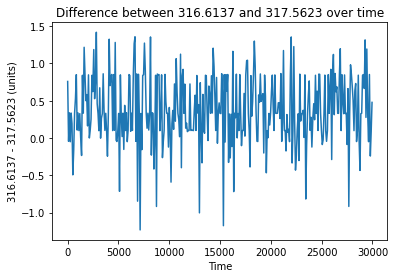

In [ ]:
plot_wavelength_diff(df, 316.6137, 317.5623)

In [ ]:
def plot_wavelength_diff_color(df, wavelength1, wavelength2):
    col1 = df[str(wavelength1)]
    col2 = df[str(wavelength2)]
    diff = col1 - col2
    fig, ax = plt.subplots()
    ax.plot((df['Unnamed: 1'] - df['Unnamed: 1'].iloc[0]) /1000, col1, color='red')
    ax.plot((df['Unnamed: 1'] - df['Unnamed: 1'].iloc[0]) /1000, col2, color='green')
    ax.plot((df['Unnamed: 1'] - df['Unnamed: 1'].iloc[0]) /1000, diff, color='blue')
    ax.set_xlabel('Time (sec)')
    ax.set_ylabel(f'Absorbance (A)')
    ax.set_title(f'Difference between {wavelength1} and {wavelength2} over time')
    ax.legend([f'{wavelength1}', f'{wavelength2}', f'{wavelength1} - {wavelength2}'], loc='upper right')
    plt.savefig('wavelength_diff_plot.png')
    plt.show()

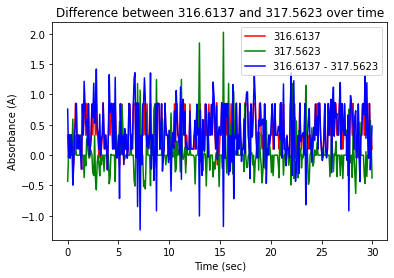

In [ ]:
plot_wavelength_diff_color(df, 316.6137, 317.5623)

In [ ]:
def diff(df, wave1, wave2):
    diff = df[wave1] - df[wave2]
    return diff

def plot():
    nm = merge_columns(df)
    nm_2 = merge_columns_nm(df, 4)
    
    fig, ax = plt.subplots()
    ax.plot((df['Unnamed: 1'] - df['Unnamed: 1'].iloc[0]) / 1000, diff(df, '316.6137', '317.5623'), color='blue')
    ax.plot((df['Unnamed: 1'] - df['Unnamed: 1'].iloc[0]) / 1000, diff(nm, '316', '317'), color='red')
    ax.plot((df['Unnamed: 1'] - df['Unnamed: 1'].iloc[0]) / 1000, diff(nm_2, nm_2.columns[1], nm_2.columns[2]), color='green')
    
    ax.set_xlabel('Time (sec)')
    ax.set_ylabel('Absorbance (A)')
    ax.set_title('Difference between unchanged, 1nm steps and 3nm steps data over time')
    ax.legend(['1nm steps', '3nm steps', 'unchanged'], loc='lower right')
    plt.show()

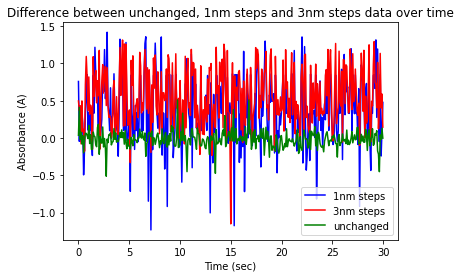

In [ ]:
plot()